


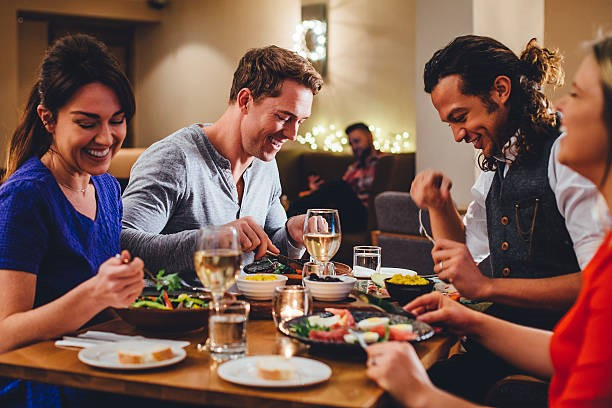

# PERSONALIZED RESTAURANT RECOMMENDER SYSTEM

## 1. BUSINESS UNDERSTANDING

### 1.1 Overview

The U.S. dining industry is rich and varied, yet locals and tourists often find it difficult to discover restaurants that meet their specific preferences. The abundance of options, without a centralized platform for personalized recommendations, complicates the decision-making process. Our system addresses this by offering tailored dining suggestions, enhancing user experience and supporting local businesses.


### 1.2 Stakeholder Definition

The possible stakeholders in this project include:

•	Users: Individuals seeking personalized dining recommendations based on their unique preferences.

•	Restaurant Owners: Local businesses aiming to attract targeted customers and increase foot traffic.

•	Investors/Partners: Entities interested in the platform’s growth, scalability, and profitability.


### 1.3 PROBLEM STATEMENT

As the dining industry expands, consumers are overwhelmed by the numerous restaurant options, making it difficult to find establishments that match their preferences. The absence of a centralized platform for personalized recommendations complicates decision-making, especially for those in unfamiliar areas. Existing solutions are too generalized and lack real-time, location-based suggestions. As the dining scene diversifies, there's an urgent need for an intelligent recommender system to provide tailored, real-time dining suggestions, enhancing the overall experience.


### 1.4 OBJECTIVES

#### 1.4.1 Main Objective

Develop a user-friendly restaurant recommender system that provides personalized, real-time suggestions based on user location and cuisine preferences. The system will utilize various data sources to ensure accurate and relevant recommendations.


#### 1.4.2 Specific Objectives


-  Analyze key factors for restaurant ratings, identifying and evaluating the key attributes and factors that significantly influence restaurant ratings and customer preferences using data analysis techniques. 

- Develop content-based recommendation algorithms, creating and implementing advanced content-based on algorithms that can generate personalized restaurant recommendations based on     user-defined text, restaurant names, and other user preferences. 

- Implement filtering techniques to refine recommendations.

- Create an intuitive, responsive web and mobile application.


### 1.5 Proposed Solution

We propose developing a Restaurant Recommender System specifically for the United States.This system will help with:

•	Comprehensive Mapping: Systematically map and categorize restaurants in the United States, grouping them by cuisine type, location, and other relevant factors.

•	Personalized Recommendations: Enable users to input their current location and preferred cuisine type, delivering a ranked list of nearby restaurants based on their ratings and proximity.

•	Enhanced User Experience: Offer an intuitive, user-friendly interface with integrated map features to simplify navigation and help users easily explore and select dining options.


### 1.6 Metrics of success

Metrics of Success will include:
•	User Engagement: Measured by the number of active users, frequency of use, and user retention rates.

•	Recommendation Accuracy: Evaluated through user feedback and satisfaction scores, focusing on how well the recommendations match user preferences.

•	Business Impact: Analyzed by the increase in traffic and revenue for partnered restaurants.

•	Scalability: Assessed by the system’s ability to handle an expanding user base and restaurant data across various states.


### 1.7 Challenges

Some of the challenges we may experience during this project include:

- Data Collection and Quality: Ensuring the platform has access to accurate and up-to-date restaurant data is crucial, as incomplete or outdated information can lead to poor recommendations and user dissatisfaction.


- Scalability: As the user base and the number of restaurants grow, the platform must efficiently handle increased data processing and maintain real-time performance across various states, ensuring a seamless user experience.


- Competition: Differentiating the platform from established competitors like Yelp and TripAdvisor is essential. The platform needs to offer unique value propositions to attract users in a crowded market.


- Privacy and Data Security: Protecting user data and ensuring compliance with privacy regulations is a significant challenge. Building trust with users regarding data usage is vital to maintaining their engagement and loyalty.















***
## 2. DATA UNDERSTANDING
***
The data used in this project was sourced from [YELP](https://www.yelp.com/dataset/download). It is a collective dataset of various businesses and user information gotten from Yelp's website. It contains 6,990,280 reviews, 150,346 businesses, 200,100 pictures across 11 metropolitan areas and 19 states. 
The original data was filtered by concentrating only on restaurant businesses and on reviews made within the year and split into two datasets as shown 
[here](Preliminary_notebook.ipynb).

The two datasets have information on 
> 1. Restaurant Informational Data
> 2. User Review Data

Data Understanding on the two datasets are as follows::

In [1]:
# importing libraries
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from classes.understanding import DataLoader, DataChecks, DataInfo
from classes.EDA import UnivariateAnalysis, BivariateAnalysis
from classes.EDA import ComprehensiveEDA, UserEDA


#### i) Restaurant Informational Data

In [2]:
# Instantiate the DataLoader class
loader= DataLoader()

# Instantiate the DataInfo class
summary= DataInfo()

In [3]:
# Reading the restaurants csv file
restaurant_data= loader.read_data("data/restaurants.csv")

# Summary information on the restaurant df
print(f'\nRESTAURANT DATASET INFORMATION\n' + '=='*20 + '\n')
summary.info(restaurant_data)


RESTAURANT DATASET INFORMATION

Shape of the dataset : (52286, 14) 

Column Names
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object') 
 

Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52286 entries, 0 to 52285
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52286 non-null  object 
 1   name          52286 non-null  object 
 2   address       51843 non-null  object 
 3   city          52286 non-null  object 
 4   state         52286 non-null  object 
 5   postal_code   52265 non-null  object 
 6   latitude      52286 non-null  float64
 7   longitude     52286 non-null  float64
 8   stars         52286 non-null  float64
 9   review_count  52286 non-null  int64  
 10  is_open       52286 non-null  int64  
 11  attributes    51720

,latitude,longitude,stars,review_count,is_open
count,52286.000000,52286.000000,52286.000000,52286.000000,52286.000000
mean,36.997663,-87.845038,3.515234,87.241078,0.669472
std,6.010943,13.813532,0.829585,188.912445,0.470408
min,27.564457,-120.083748,1.000000,5.000000,0.000000
25%,32.217586,-90.233506,3.000000,13.000000,0.000000
50%,39.484140,-86.035621,3.500000,33.000000,1.000000
75%,39.958370,-75.337533,4.000000,89.000000,1.000000
max,53.679197,-74.664459,5.000000,7568.000000,1.000000


Dataset Overview


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN


### Restaurant Dataset Column Descriptions
***

| Column Name     | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| business_id     | Unique identifier for the business.                                         |
| name            | Name of the business.                                                       |
| address         | Street address of the business.                                             |
| city            | City where the business is located.                                         |
| state           | State where the business is located.                                        |
| postal_code     | Postal code (ZIP code) of the business location.                            |
| latitude        | Latitude coordinate of the business location.                               |
| longitude       | Longitude coordinate of the business location.                              |
| stars           | Average star rating of the (typically on a scale of 1 to 5).       |
| review_count    | Number of reviews the business has received.                                |
| is_open         | Indicator of whether the business is currently open (1 = open, 0 = closed). |
| attributes      | Additional attributes of the business (e.g., "WiFi: free", "HasTV: true").  |
| categories      | List of categories the business belongs to (e.g., "Restaurants", "Bars").   |
| hours           | Business hours (e.g., "Monday: 8am-5pm, Tuesday: 8am-5pm").                 |


In [4]:
# Instantiating Datachecks for restaurant df
checks= DataChecks(restaurant_data)

# Checking for duplicates
checks.check_duplicates()

NO DUPLICATES FOUND


In [5]:
# Checking for null values in restaurant dataset
checks.check_missing()

,Column Names,Missing Values,Percentage Missing
0,address,443,0.847263
1,postal_code,21,0.040164
2,attributes,566,1.082508
3,hours,7279,13.921509


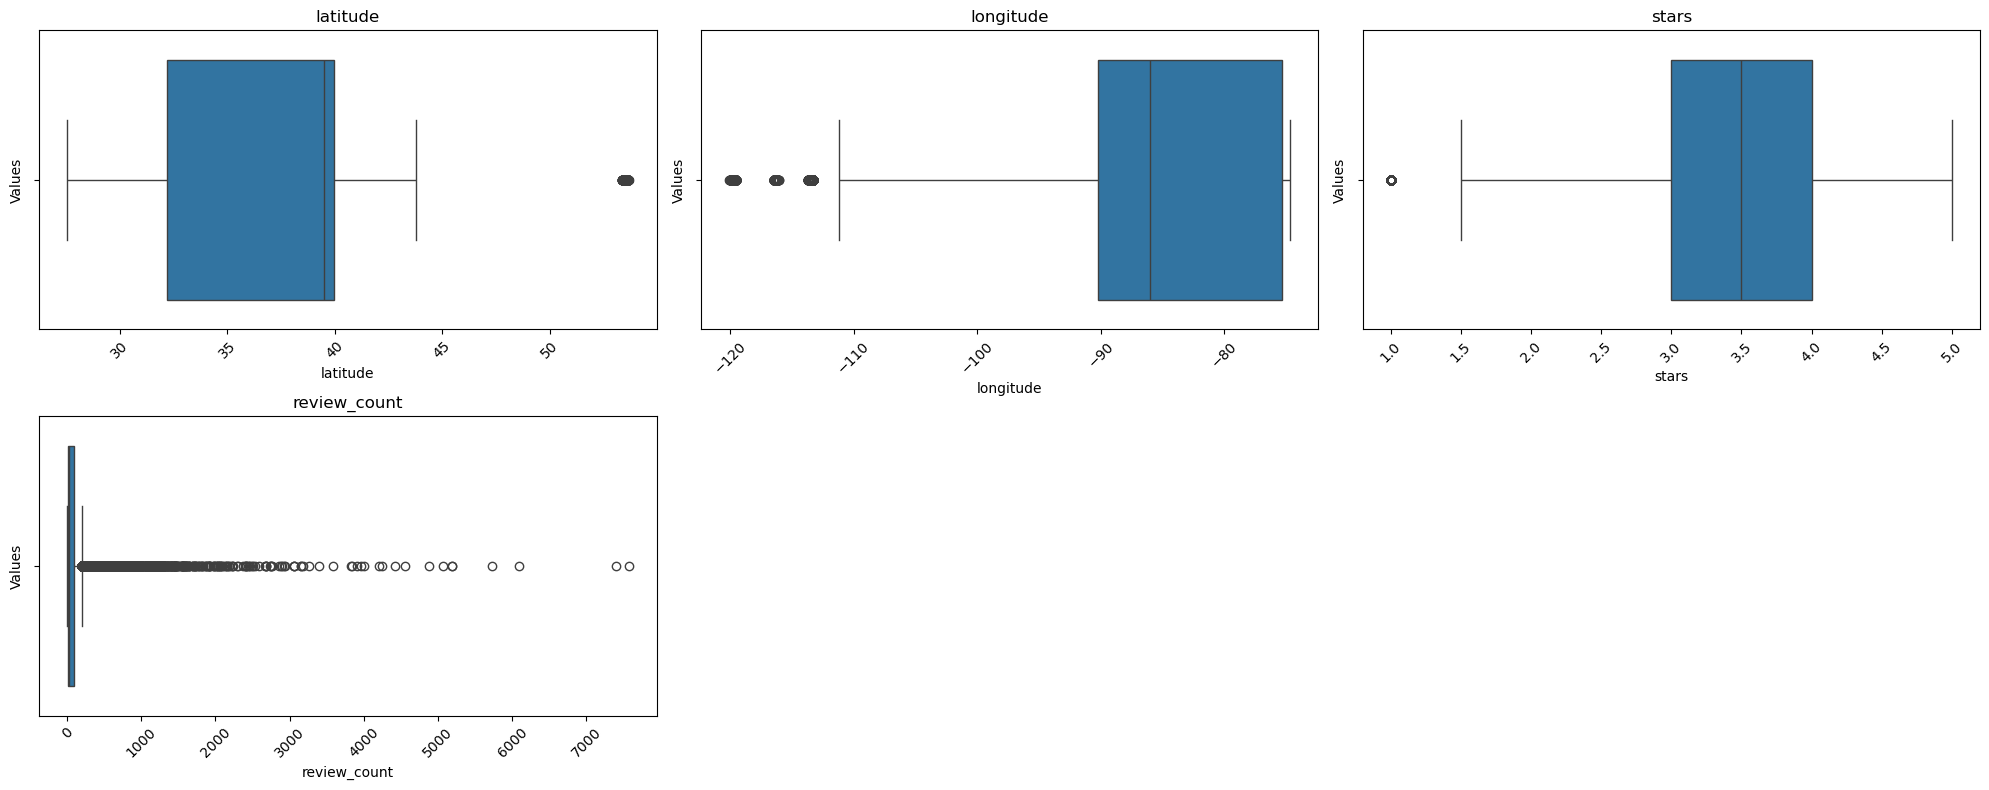

In [6]:
# check for outliers in restaurant dataset
checks.check_outliers_and_plot()

***
**Initial Observations on restaurant information data**
***
- > Restaurant information dataset has 52286 rows and 14 columns.
- > All business locations are in the North West hemisphere i.e. USA based on min and max latitude and longitude.
- > The address, 	postalcode, attributes and hours columns contain missing values and will be addressed.
- > There are no duplicated rows.
- > Majority of the businesses receive between 3-4 stars on average.
- > No significant outliers can be seen.urs

#### ii) User Review Data

In [7]:
# Loading the users csv file
users_data= loader.read_data("data/users.csv")

# Summary information on the user review data
print(f'\nUSER DATASET INFORMATION\n' + '=='*20 + '\n')
summary.info(users_data)


USER DATASET INFORMATION

Shape of the dataset : (2559586, 4) 

Column Names
Index(['user_id', 'business_id', 'stars', 'date'], dtype='object') 
 

Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559586 entries, 0 to 2559585
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   business_id  object
 2   stars        int64 
 3   date         object
dtypes: int64(1), object(3)
memory usage: 78.1+ MB

Descriptive Statistics


,stars
count,2.559586e+06
mean,3.837496e+00
std,1.450423e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


Dataset Overview


,user_id,business_id,stars,date
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11
1,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15
2,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,2018-07-17 03:30:07


### Users Reviews Dataset Column Descriptions
***
| Column Name  | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| review_id    | Unique identifier for the review.                                           |
| user_id      | Unique identifier for the user who wrote the review.                        |
| business_id  | Unique identifier for the business that the review is associated with.      |
| stars        | Star rating given by the user in the review (on a scale of 1 to 5).         |
| useful       | Count of how many users found the review useful.                            |
| funny        | Count of how many users found the review funny.                             |
| cool         | Count of how many users found the review cool.                              |
| text         | The content of the review written by the user.                              |
| date         | Date when the review was written.                                           |


In [8]:
# Instantiating Datachecks for users df
checks= DataChecks(users_data)

# Checking for duplicates for users df
checks.check_duplicates()


,user_id,business_id,stars,date
988470,wAph_egpAXr9ic-A2vnINQ,fiGh8ctcvIRm4Ii2GOtoHQ,2,2018-07-23 21:43:33
997259,wAph_egpAXr9ic-A2vnINQ,fiGh8ctcvIRm4Ii2GOtoHQ,2,2018-07-23 21:43:33
1980862,xZ0ioQJ0Jyo_Uc0FzmyFQQ,O_kAd89gPls-dXda40NWzA,5,2019-11-22 07:18:46
2005725,xZ0ioQJ0Jyo_Uc0FzmyFQQ,O_kAd89gPls-dXda40NWzA,5,2019-11-22 07:18:46


In [9]:
# Checking for null values in users df
checks.check_missing()

NO NULL VALUES FOUND


In [10]:
# check for outliers in users df
checks.check_outliers_and_plot()

NO OUTLIERS FOUND


***
**Initial Observations on user review data**
***
> The user review dataset contains 2559586 rows and 4 columns

> There is evidence of duplicated data and would require cleaning

> There are no null values in the dataset.

> Majority of users rate restaurants between 3 and 4 stars

> useful, funny and cool columns do not seem to show any relevant information

***
## Exploratory Data Analysis Using `EDA.py` Classes
***

In this section of the notebook, we will initiate the exploratory data analysis by instantiating the classes defined in our `EDA.py` script. These classes are designed to facilitate the visualization of various features within the `restaurants.csv` dataset, aiding in our understanding of the data's structure and trends.

The analysis is split between:

    i)  Univartiate Analysis of restaurant data
    
    ii) Bivariate analysis  of restaurant data

    iii) Analysis on User Reviews data

In [11]:
# Append the path where the EDA modules are located to sys.path
sys.path.append(os.path.abspath('EDA'))


### i) Univariate Analysis of Restaurant data
***

We first perform our univariate EDA on the `restaurants.csv` dataset to examine each variable independently. 


- **Star Ratings (`stars`)**: Histogram of star ratings offer insights into the overall quality as perceived by customers, helping identify general satisfaction levels.
- **State Distribution (`state`)**: Bar charts showing the number of restaurants per state reveal geographical market saturation and potential areas for business expansion.
- **Operational Status (`is_open`)**: Pie charts of open vs closed status provide a snapshot of the business landscape, indicating the proportion of actively operating restaurants.


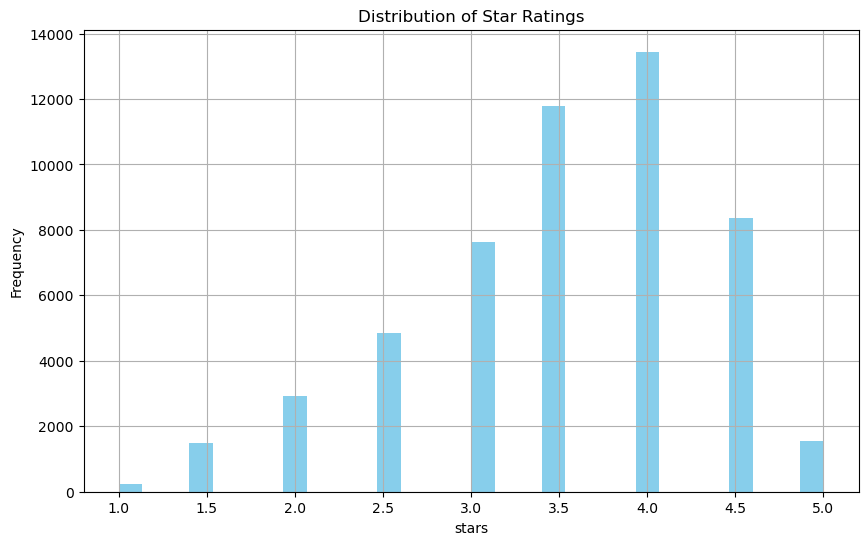

In [12]:
# Instantiate the UnivariateAnalysis class with the DataFrame
uni_analysis = UnivariateAnalysis(restaurant_data)

# Plotting the histogram of review counts
uni_analysis.plot_histogram('stars', 'Distribution of Star Ratings')

**Observations**
***

Most common ratings are 4.0 and 3.5 stars, indicating general satisfaction.

Ratings below 2.5 stars are uncommon, showing few very poor experiences.

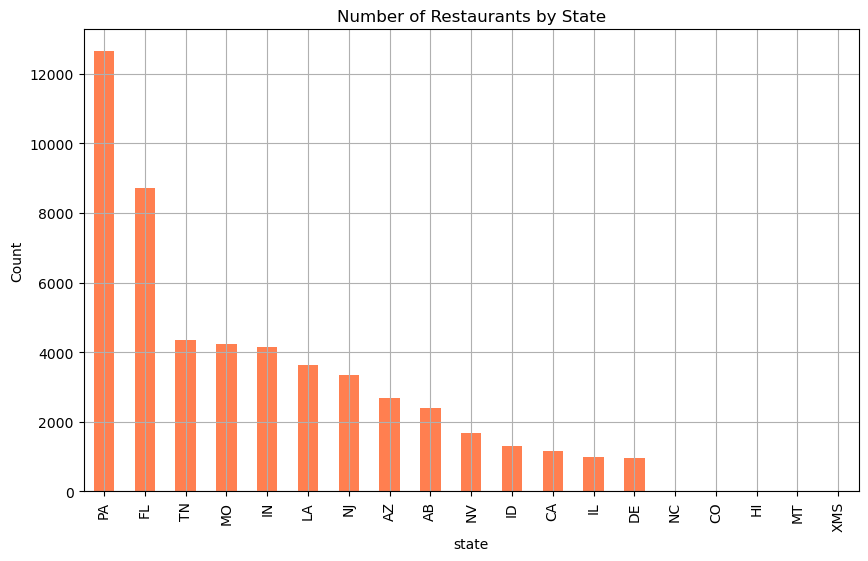

In [13]:
# Plotting the bar chart for the number of restaurants by state
uni_analysis.plot_bar_chart('state', 'Number of Restaurants by State')

**Observations**
***

Pennsylvania (PA), Florida (FL) and Tennessee (TN) boast the highest numbers of restaurants among the states, highlighting them as major markets for the restaurant industry. 

Conversely, there is a noticeable decrease in restaurant counts moving from left to right in the graph. States like North Carolina (NC), Colorado (CO), Hawaii (HI), and Montana (MT) demonstrate lack of a complete dataset in these regions. 

Understanding these patterns can help tailor location-based strategies in the restaurant recommendation system to optimize user experiences and business growth.

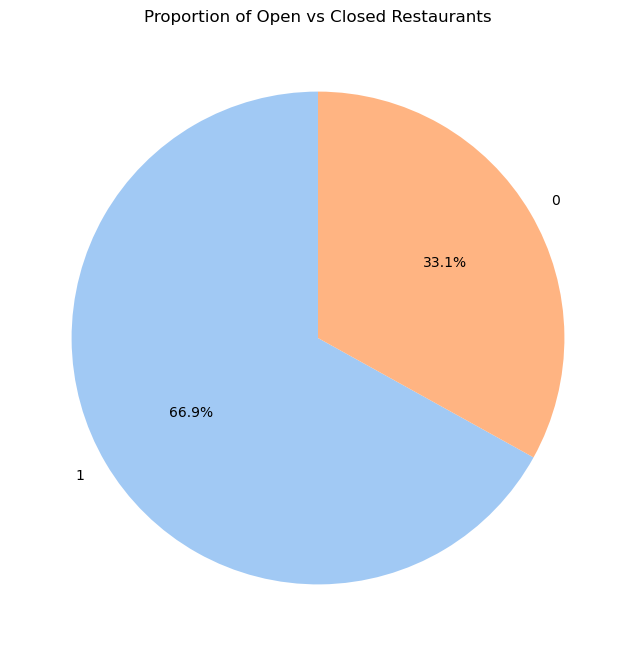

In [14]:
# Plotting the pie chart for the proportion of open vs closed restaurants
uni_analysis.plot_pie_chart('is_open', 'Proportion of Open vs Closed Restaurants')

**Observations**
***

- **66.9% Open Restaurants**: A significant majority of the restaurants in our dataset are currently operational. This proportion suggests a robust industry where the majority of listed entities are active, presenting numerous options for recommendations.

- **33.1% Closed Restaurants**: A substantial portion of the restaurants are no longer in operation. This data is crucial for ensuring accuracy in our recommendation system by filtering out closed establishments, thereby improving user experience and system reliability.

**Strategic Recommendations:**
***
 Regular updates and verification processes are necessary to maintain the accuracy of the system, ensuring that closed restaurants are removed from active recommendation lists.


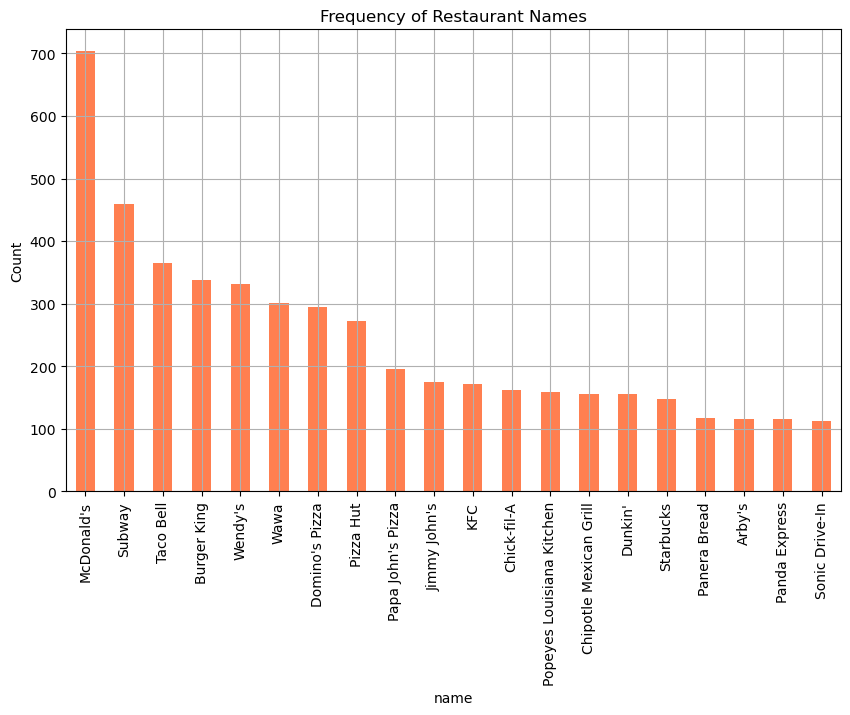

In [15]:
# Plot on most common restaurant names in dataset
uni_analysis.plot_bar_chart('name', 'Frequency of Restaurant Names', limit=20)

**Observations**
***

McDonald's, Subway, and Taco Bell lead in frequency, indicating a high presence of these chains within the dataset. This suggests a dominance of fast-food chains in the restaurant landscape.

The frequency of well-known names like Wendy's, Domino's Pizza, and Pizza Hut reflects their popularity, which can be leveraged in recommending familiar choices to users of the recommendation system.

**Strategic Implications**: 
***

Understanding which brands are most common can help tailor marketing strategies within the recommendation system, highlighting promotions, deals, or new menu items from these popular chains.


### ii) Bivariate Analysis of the Restaurant Data
***

In this section, we use the `BivariateAnalysis` class to explore relationships between pairs of variables in the `restaurants.csv` dataset. By examining these relationships, we aim to uncover patterns and correlations that can inform better decision-making for restaurant recommendations and business strategies.



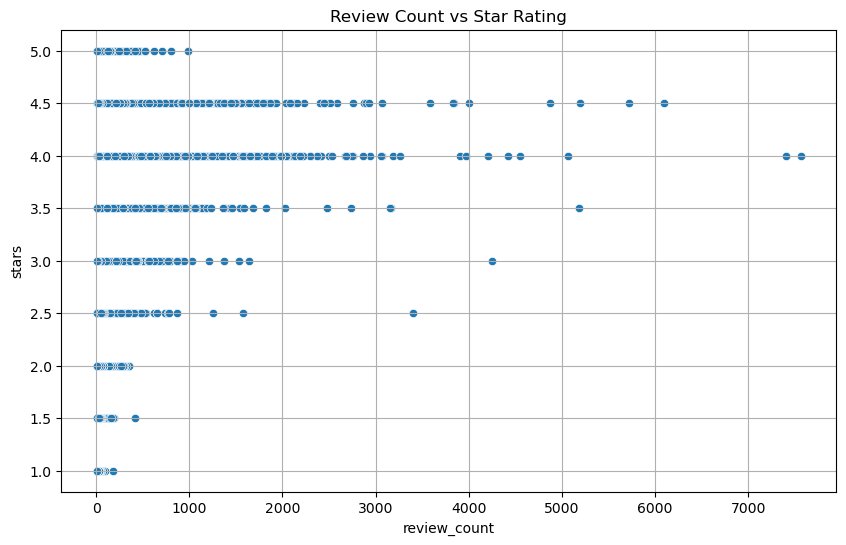

In [16]:
# Instantiate the BivariateAnalysis class with the DataFrame
bi_analysis = BivariateAnalysis(restaurant_data)

# Plotting the scatter plot to explore correlations between review counts and star ratings
bi_analysis.plot_scatter('review_count', 'stars', 'Review Count vs Star Rating')

**Observations**
***

 Higher review counts are more commonly associated with mid to high ratings (3.0 to 5.0 stars).

The highest review counts appear at 4.0 and 5.0 star ratings, suggesting high customer engagement with top-rated restaurants.

Restaurants with ratings between 1.0 and 2.5 stars tend to have fewer reviews, indicating less engagement or fewer customers.

The vertical spread at each rating level, especially at high ratings, indicates variability in the popularity of restaurants with similar ratings.


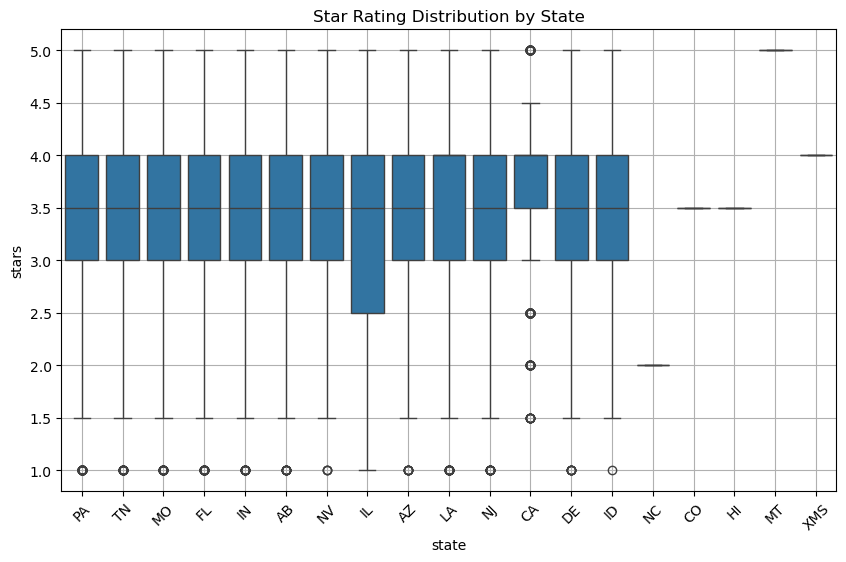

In [17]:
# Plotting the boxplot to analyze how star ratings vary across different states
bi_analysis.plot_boxplot('state', 'stars', 'Star Rating Distribution by State')

**Observations**
***
Most states, including Pennsylvania (PA), Tennessee (TN), Missouri (MO), Florida (FL), and New York (NY), show a tight clustering around the median star rating (between 3.5 and 4.0), suggesting a general consistency in customer satisfaction.
  

States like California (CA), Idaho (ID), North Carolina (NC), and Colorado (CO) display significant variability in their ratings with outliers indicating both exceptionally high and low ratings. This suggests a diverse range of restaurant experiences.

Hawaii (HI) and Montana (MT) show a broader spread in ratings, which could indicate inconsistency in restaurant quality or varied customer expectations.





### iii) Analysis on User Reviews data
***

Next, we'll perform EDA on the users.csv dataset. The analysis will help in enhancing our understanding of the user dynamics within our platform, guiding strategic decisions and improvements.
This analysis centered on the distribution of ratings across users and a trend analysis on frequency of reviews

In [18]:
# Instantiate the ComprehensiveEDA class with the users DataFrame
eda_users = ComprehensiveEDA(users_data)

# Instantiate the UserEDA class specifically designed for user-related data analysis
user_eda = UserEDA(users_data)

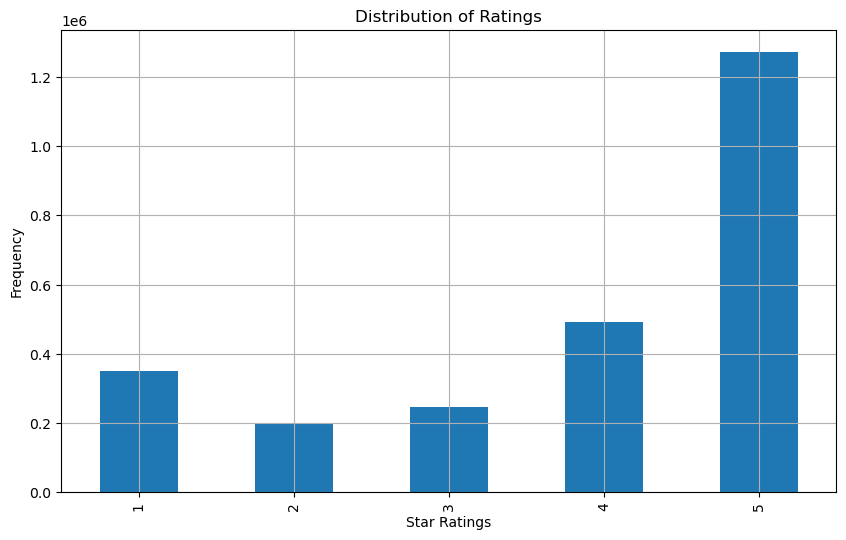

In [19]:
user_eda.plot_rating_distribution()

**Observations**
***
The distribution of ratings from the users.csv dataset reveals a notable preference for higher ratings, with 5-star ratings significantly more frequent than others. 

c:\Users\user\Documents\Moringa\CAPSTONE\Restaurant-Recommendation-System\classes\EDA.py:166: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.show()


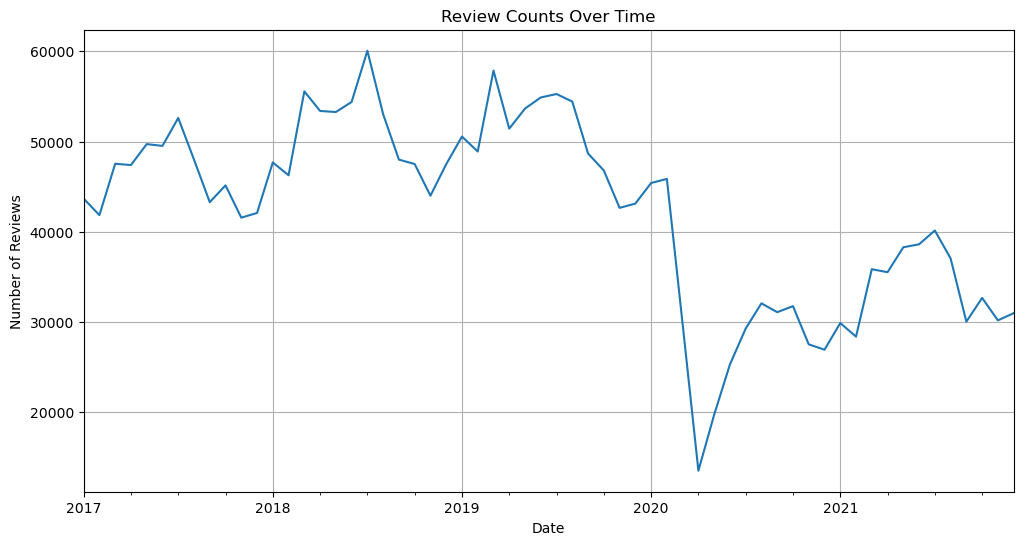

In [20]:
user_eda.plot_reviews_over_time()

**Observations**
***

- **Seasonal Trends**: Frequent peaks between April and July, indicating increased customer engagement during this period.
- **Decline in Engagement**: Noticeable drops in reviews occur after July, particularly in September and December.
- **Covid Impact**: Evidence of declined restaurnat reviews in the year 2020 due to the COVID outbreak
- **Impact on our Recommender System**:
  - Incorporate seasonality into recommendations.
  - Optimize timing for promotional activities based on review trends.
  
